#### **Vectorization이 갖고 있는 치명적인 단점을 해결**해주는 것이 바로 **Word Embedding.**

# Embedding이란?
- **Vectorization의 치명적인 단점** : **단어나 문장들 사이의 관계**에 대해서 설명하지 못한다는 것.

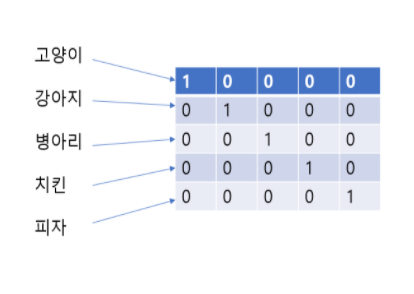

- one hot encoding을 통해 각 5개의 토큰들이 고유의 벡터를 갖게 되었지만, *벡터화 방법들은 **단어의 중요도**나 **문서 안에서의 중요도**는 구분할 수 있지만* **단어 사이의 유사도는 구별할 수 없음.**
- 이 때 사용되는 것이 **Embedding 기법**이며 **word2vec**을 비롯한 다양한 Embedding 기법들이 존재함.
- Embedding의 대략적인 아이디어 : "의미가 유사한 토큰들은 가깝게 임의의 차원에 뿌려보자!!"

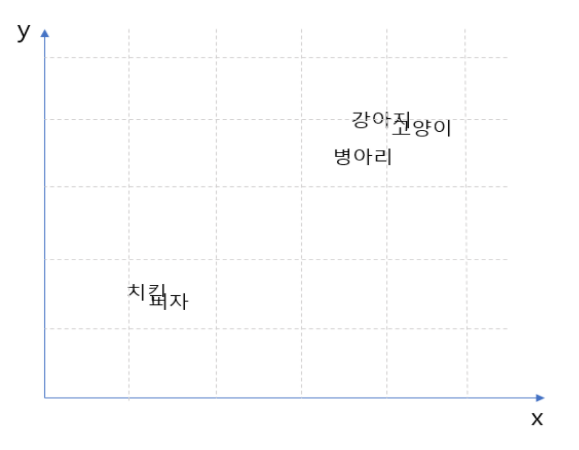

- 위의 그림처럼 **비슷한 의미를 내포하고 있는 토큰들은 서로 가깝게, 그렇지 않은 토큰들은 서로 멀리** 뿌리도록 하는 것이 **임베딩의 목적**.
- 검색 시스템, 감성 분석 등에서는 훌륭한 임베딩을 수행하는 것이 전체 문제 해결에 많은 영향을 줌.
- **임베딩 또한 '하나의 모델'**을 의미하며 **훈련이 필요**함. 데이터가 충분하고 시간이 많으면 **소지한 데이터에 특화된 임베딩 모델을 학습시킬 수 있음**. **보통은 pre-trained embedding model**을 가져와서 사용함.

## 1. Keras Embedding Layer

- 기본적으로 **가장 쉽고 빠르게** 네트워크 모델에 임베딩 층을 주입할 수 있는 방식. 이 방법은 **무작위로 특정 차원으로 입력 벡터들을 뿌린 후 학습을 통해 가중치들을 조정**해 나가는 방식. **즉, 단어 사이의 관계를 반영하는 방법이 아님.**

In [ ]:
# keras 코드로 아래와 같이 구현

# model = Sequential()
# model.add(Embedding(vocab_size, 128, input_length = max_len))

## 2. word2vec
- word2vec의 핵심 아이디어 : **"친구를 보면 그 사람을 알 수 있다."** **주변 단어와의 관계**를 통해 **해당 단어의 의미적 특성을 파악**. (word2vec 참고 : https://dreamgonfly.github.io/blog/word2vec-explained/)

#### <word2vec embedding matrix를 keras의 embedding에 주입하는 과정>
A. 구글의 사전 훈련된 word2vec bin 파일을 다운로드(https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)

B. gensim 모듈과 bin 파일을 활용해 word2vec 모델을 로드


> gensim word2vec : 단어마다 차례로 인덱싱을 하여 벡터화하지 않고, 유사한 단어들을 비슷한 방향과 힘의 벡터를 갖도록 단어를 벡터화시켜주는 방법 중 하나.



C. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장

D. keras embedding layer에 embedding_matrix를 가중치로 주어 이용


In [2]:
import os
os.getcwd()
os.chdir('drive/MyDrive/NLP/Dacon_NH competition/')

In [2]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 45.6MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


### B. gensim 모듈과 bin 파일을 활용해 word2vec 모델을 로드

In [3]:
import gensim

word2vec = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary = True)

In [46]:
word2vec.vector_size

300

In [4]:
import pandas as pd

train = pd.read_csv('data/news_train_preprocessing_Mecab.csv')
train.head()

,n_id,date,title,content,ord,info,new_article,text
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0,"['이데일리', '현재', '코스닥', '기관', '억', '순매도']",이데일리 현재 코스닥 기관 억 순매도
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1,"['실적', '기반', '저가', '에', '매집', '해야', '할', '월', ...",실적 기반 저가 에 매집 해야 할 월 급등 유망주 전격 공개
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1,"['하이스', '탁론', '선취', '수수료', '없', '는', '월', '최저'...",하이스 탁론 선취 수수료 없 는 월 최저 금리 상품 출시
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0,"['종합', '경제', '정보', '미디어', '이데일리', '무단', '전재', ...",종합 경제 정보 미디어 이데일리 무단 전재 재 배포 금지
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0,"['전국', '적', '인', '소비', '붐', '조성', '에', '기여', '...",전국 적 인 소비 붐 조성 에 기여 할 예정


In [6]:
token_list = [t.split(' ') for t in train['text'] if type(t) != float]
token_list[:5]

[['이데일리', '현재', '코스닥', '기관', '억', '순매도'],
 ['실적', '기반', '저가', '에', '매집', '해야', '할', '월', '급등', '유망주', '전격', '공개'],
 ['하이스', '탁론', '선취', '수수료', '없', '는', '월', '최저', '금리', '상품', '출시'],
 ['종합', '경제', '정보', '미디어', '이데일리', '무단', '전재', '재', '배포', '금지'],
 ['전국', '적', '인', '소비', '붐', '조성', '에', '기여', '할', '예정']]

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text2sequence(train_text, max_len=100):   # 여기 max_len에 가장 긴 문장의 길이를 넣기
  tokenizer = Tokenizer()                                   # keras의 vectorizing 함수 호출
  tokenizer.fit_on_texts(train_text)                        # train 문장에 fit
  train_X_seq = tokenizer.texts_to_sequences(train_text)    # 각 토큰들에 정수값 부여
  vocabulary = tokenizer.word_index
  vocab_size = len(tokenizer.word_index) + 1                # 모델에 알려줄 vocabulary의 크기 계산(padding값 0을 포함해야 하므로 +1)
  print('vocab_size : ', vocab_size)
  X_train = pad_sequences(train_X_seq, maxlen = max_len)    # 설정한 문장의 최대 길이만큼 padding

  return X_train, vocabulary, vocab_size, tokenizer

In [8]:
train_X, vocabulary, vocab_size, vectorizer = text2sequence(token_list, max_len = 100)

vocab_size :  40251


### C. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장

In [10]:
import numpy as np

embedding_matrix = np.zeros((vocab_size, 300))     # 300차원의 임베딩 매트릭스 생성
cnt = 0

for index, word in enumerate(vocabulary):          # vocabulary에 있는 토큰들을 하나씩 넘김
  if word in word2vec:                             # 넘겨받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 의미)
    embedding_vector = word2vec[word]              # 해당 토큰에 해당하는 vector를 불러오고
    embedding_matrix[index] = embedding_vector     # 해당 위치의 embedding_matrix에 저장
  else:
    cnt += 1
    # print("word2vec에 없는 단어입니다.")
    continue

In [ ]:
embedding_matrix[index]

### D. keras embedding layer에 embedding_matrix를 가중치로 주어 이용

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

max_len = 100

model = Sequential()
model.add(Embedding(vocab_size, 300, weights = [embedding_matrix], input_length = max_len))

## 3. glove

- glove는 **word2vec의 단점을 보완**하기 위해 등장하였음. **word2vec이 사용자가 지정한 주변 단어의 개수에 대해서만 학습**이 이루어지기 때문에 **데이터 전체에 대한 정보를 담기 어렵다는 단점**을 지적.
- glove의 핵심 아이디어 : **"각 토큰들 간의 유사성은 그대로 가져가면서 데이터 전체에 대한 빈도를 반영하자!"**


#### <glove embedding matrix를 keras의 embedding matrix에 주입하는 방법>
A. 사전 훈련된 벡터를 갖고 있는 txt 파일을 다운로드 (https://drive.google.com/file/d/1yHGtccC2FV3_d6C6_Q4cozYSOgA7bG-e/view)

B. txt 파일에 있는 단어와 벡터들을 glove dictionary에 저장

C. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장

D. keras embedding layer에 embedding_matrix를 가중치로 줘서 이용

### B. txt 파일에 있는 단어와 벡터들을 glove dictionary에 저장

In [39]:
# load the whole embedding into memory

glove = dict()
f = open('glove.txt')
for line in f:
  values = line.split()
  word = values[0]
  vector = np.asarray(values[1:], dtype = 'float32')
  glove[word] = vector
f.close()

In [45]:
vector.shape

(100,)

### C. vocabulary에 있는 토큰들의 벡터를 가져와 embedding matrix에 저장

In [47]:
cnt = 0
embedding_matrix = np.zeros((vocab_size, 100))     # 100 차원의 임베딩 매트릭스 생성

for index, word in enumerate(vocabulary):          # vocabulary에 있는 토큰들을 하나씩 넘김
  if word in glove:                                # 넘겨받은 토큰이 glove에 존재하면(이미 훈련이 된 토큰이라는 의미)
    embedding_vector = glove[word]                 # 해당 토큰에 해당하는 vector를 불러오고
    embedding_matrix[index] = embedding_vector     # 해당 위치의 embedding_matrix에 저장
  else:
    cnt += 1
    # print("glove에 없는 단어입니다.")
    continue

### D. keras embedding layer에 embedding_matrix를 가중치로 줘서 이용

In [49]:
model = Sequential()
model.add(Embedding(vocab_size, 100, weights = [embedding_matrix], input_length = max_len))

## 4. Fasttext

- Fasttext의 핵심 아이디어 : **단어 단위가 아닌 sub 단어를 단위로 사용**.


> (ex) word2vec -> "apple" 학습,  

>    FastText -> "ap", "pp", "pl", "le" 학습

- 따라서 **미리 학습되지 않은 단어들에 대한 vector도 표현해준다는 장점**이 있음.




